<a href="https://colab.research.google.com/github/Bishawa/Covid19_Tweet_Sentiment_Analysis/blob/main/Copy_of_Finalcorona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -         **Coronavirus Tweet Sentiment Analysis**

---



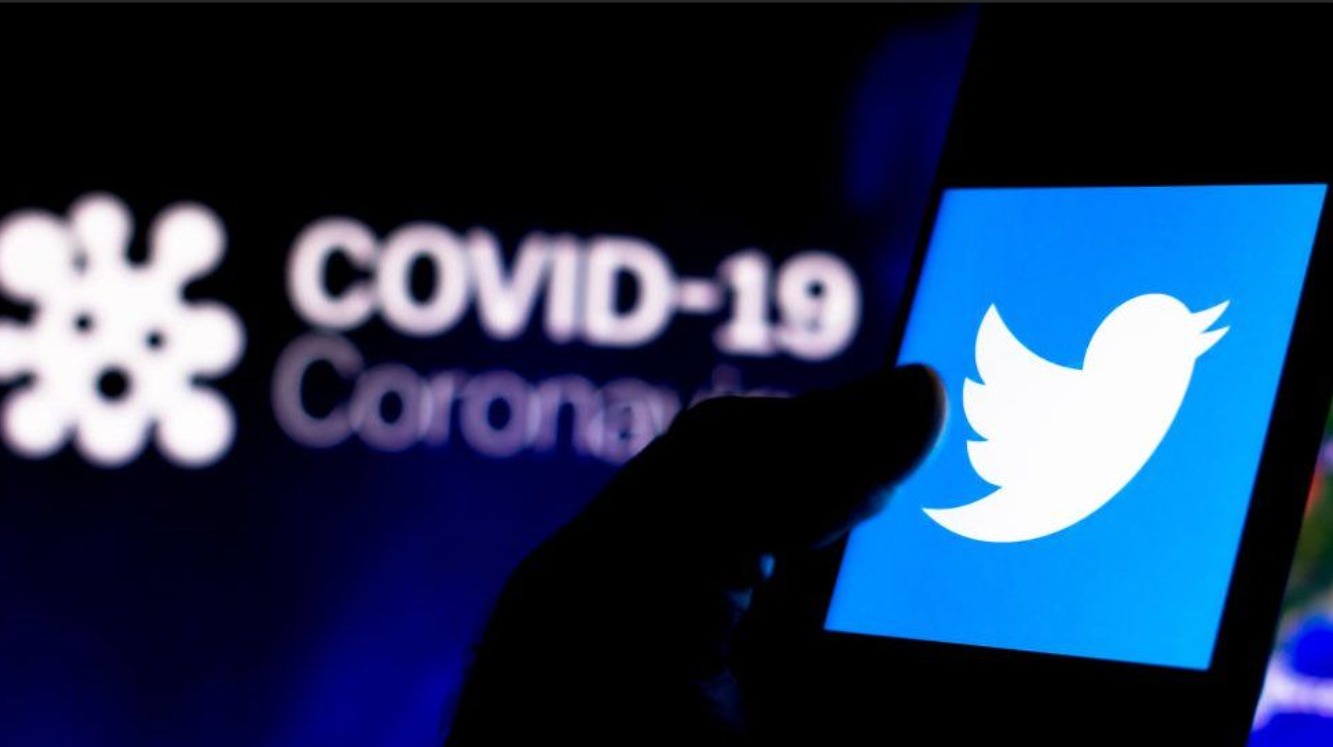

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

The COVID-19 pandemic is a global outbreak of the coronavirus, an infectious disease caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) virus.

The first cases of the novel coronavirus (nCoV) were first detected in China in December 2019, with the virus quickly spreading to other countries around the world. This led the WHO to declare a public health emergency of international concern on 30 January 2020 and to designate the outbreak as a pandemic on 11 March 2020.

Since the start of the COVID-19 pandemic, more than 2 million people have died from the disease in the European region.

Sentiment analysis of tweets related to the coronavirus can provide valuable insights into public opinion and perception of the virus. It can be used to track changes in sentiment over time, identify influential users and groups, and identify specific issues or concerns related to the virus. However, it is important to note that sentiment analysis is not a straightforward task and results may vary depending on the dataset, pre-processing and modeling used. Sentiment analysis of tweets can be challenging due to informal language, use of slang and emoticons, and the presence of sarcasm and irony.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.**

**You are given the following information:**

**usename**

**screen name**

**Location**

**Tweet At**

**Original Tweet**

**Sentiment**

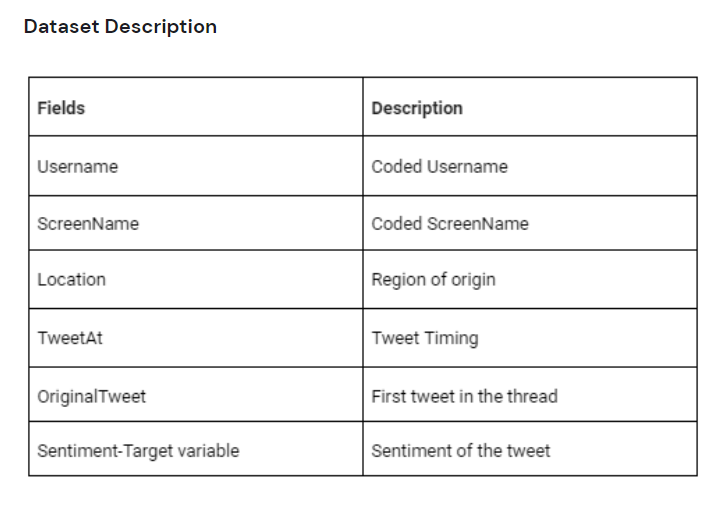

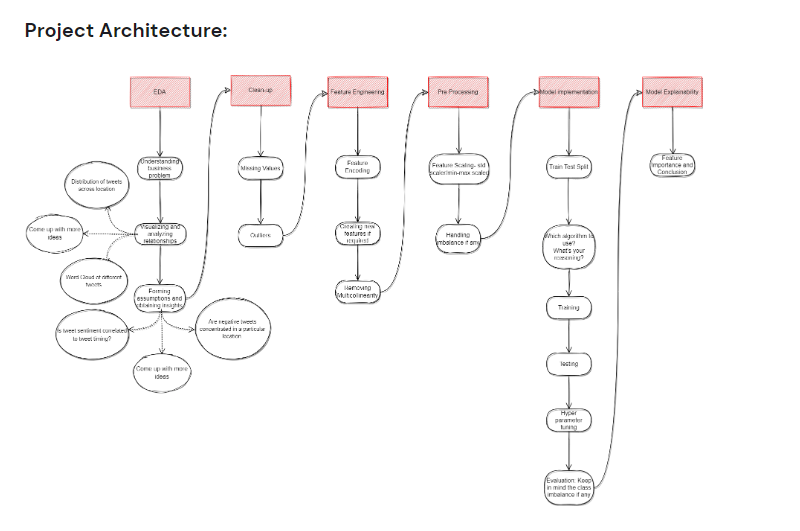

## **Mounting the drive to access the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [16]:
#First we are importing all the essential libraries used in our analysis.

## EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import missingno as msno
from datetime import datetime

##Text Preprocessing Libraries
import nltk
from wordcloud import WordCloud
import string


##Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4 ML /Capstone Project - Classification/Coronavirus Tweets.csv', encoding= 'ISO-8859-1', low_memory=False)
##Here we have used encoding = 'ISO-8859-1' to deal with the unicode error

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


The **head()** function is used to get the first n rows, which is five by default.

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape   #There are 41,157 observations and 6 features in our dataset

(41157, 6)

**Shape()**: The shape property returns a tuple containing the shape of the DataFrame.

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**info():** The info() method prints information about the DataFrame.

#### There are null values in our location column

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### There are no duplicate values in our dataset

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

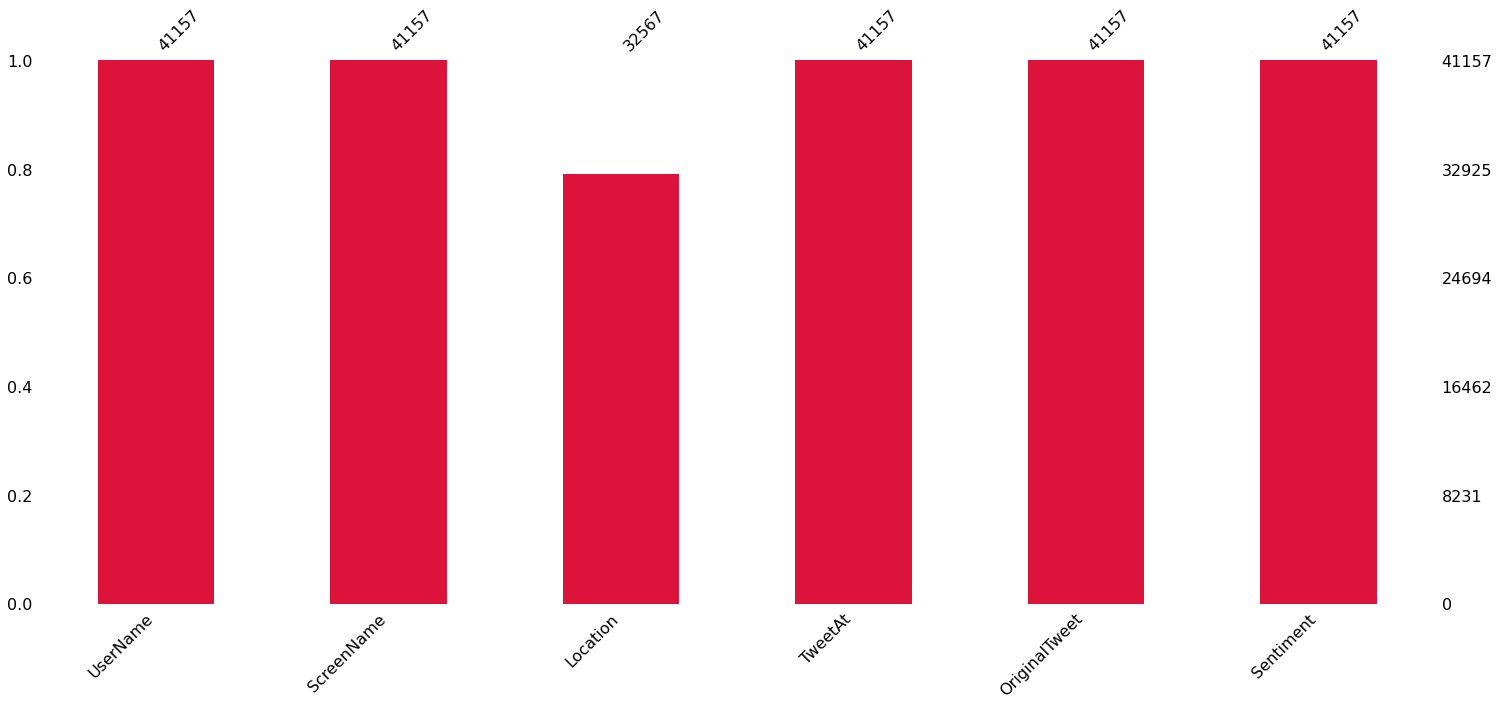

In [ ]:
# Visualizing the missing values
msno.bar(data, color='crimson')

### What did you know about your dataset?

#### 1. We can see that there are 41,157 observations and 6 features in our dataset.
#### 2. There are no duplicate values in our dataset.
#### 3. There are many null values in location column in our dataset.
#### 4. This dataset contains the tweets from different users, all tweets are related to COVID19.
#### 5. And Sentiments values are given that describes the sentiment related to a particular tweet, it determines if the tweet is positive, negative, extremely positive, extremely negative or neutral.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### Variables Description 

#### 1. There are total 6 variables in our dataset.
#### 2. One of the most important features are OriginalTweet and Sentiment.
#### 3. We have quite a good number of null values in the feature Location.
#### 4. There are 2 numerical features in our dataset, which are UserName and ScreenName.
#### 5. Also we have a column named 'TweetAt' that specify the date when the tweet was posted by the user.

### Check Unique Values for each variable.

In [ ]:
data['Location'].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

**unique ()** function is a function that returns the unique values from the given lists or array of values.

In [ ]:
# A for loop is used for iterating over a sequence (that is either a list, a tuple, a dictionary, a set, or a string).
data_columns_list = data.columns.to_list()
for i in data_columns_list:
  print('\033[1m'+'\n\nThe Unique Values in'+'\033[0m','\033[1m'+ i+'\033[0m', 'are:', data[i].unique())



The Unique Values in UserName are: [ 3799  3800  3801 ... 44953 44954 44955]


The Unique Values in ScreenName are: [48751 48752 48753 ... 89905 89906 89907]


The Unique Values in Location are: ['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']


The Unique Values in TweetAt are: ['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']


The Unique Values in OriginalTweet are: ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours scho

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Our dataset contains Text data so its better to convert it into string as its textual content.
data['OriginalTweet']=data['OriginalTweet'].astype(str)
data['Sentiment']=data['Sentiment'].astype(str)
     

In [ ]:
## Converting the Date Column Data Type To DateTime 
data["TweetAt"]=pd.to_datetime(data["TweetAt"])

In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**NLTK (Natural Language Toolkit)** :is the go-to API for NLP (Natural Language Processing) with Python. It is used to preprocess text data for further analysis like with ML models for instance. It helps convert text into numbers, which the model can then easily work with.


In [ ]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
## Creating new columns that represents the count of characters, words and sentences in a tweet
data['num_char']= data['OriginalTweet'].apply(len)
data['num_words'] = data['OriginalTweet'].apply(lambda x:len(nltk.word_tokenize(x)))
data['num_sentences'] = data['OriginalTweet'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,237,38,1
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,306,58,4
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4


In [ ]:
## Checking out highest number of tweets posted by which location
data.Location.value_counts().head()

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
Name: Location, dtype: int64

In [ ]:
data.shape

(41157, 9)

In [ ]:
data['UserName'].nunique()

41157

### What all manipulations have you done and insights you found?

#### 1. At first we converted our text data into string format.
#### 2. As we can see that there are 5 classes in our Sentiment column, so we decided to make it 3 by converting extreme positives to positive and extreme negatives to negatives.
#### 3. After that we converted 'TweetAt' Column to proper Datetime Format.
#### 4. Then we created new columns named Year, Month, and Day from 'TweetAt' Column.
#### 5. At last, we dropped TweetAt column from the dataset
#### 6. Then, we Created new columns that represents the count of characters, words and sentences in a tweet, whcich'll further help us in analysing the data through visuals.
#### 7. After that, we calculated Which location has the highest number of tweets.

##  ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Total percent of Sentiment count with respect to their Tweets.

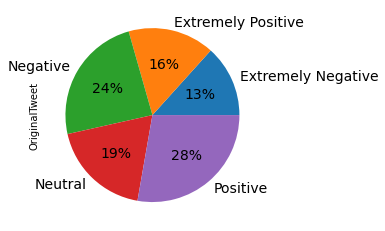

In [ ]:
#Pie plot
data.groupby('Sentiment')['OriginalTweet'].count().plot(kind = 'pie', autopct='%.0f%%', textprops={'fontsize': 14})

##### 1. Why did you pick the specific chart?

##### 1. We picked this pie chart to plot the relationship between Sentiment and OriginalTweet

##### 2. Pie charts are useful to represent data that is categorical.

##### 2. What is/are the insight(s) found from the chart?

##### **As we can see from the above visual that 44% tweets are positive, 37% are negative and 19% tweets are neutral. There are good number of positive tweets that shows positive mindset of people during the pandemic.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

##### **As the sentiment of many tweets are positive so business can look forward to run ads related to more positive content, so that the click-through rates will increase and also the revenue.**

#### Number of character counts present in the tweet and their sentiments.


Text(0.5, 1.0, 'Number of Sentences and Sentiment Relation')

<Figure size 720x360 with 0 Axes>

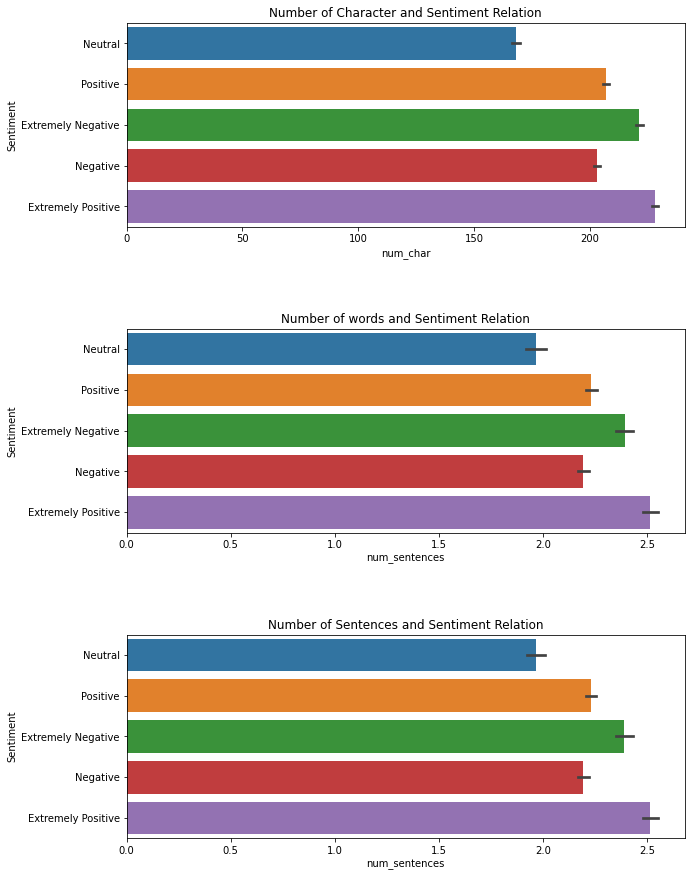

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15)) 
ax = axes.flatten()
sns.barplot(data=data, x='num_char', y='Sentiment', ax=ax[0])
plt.subplots_adjust(hspace=0.5, wspace=0.2)
sns.barplot(data=data, x='num_sentences', y='Sentiment', ax=ax[1])
sns.barplot(data=data, x='num_sentences', y='Sentiment', ax=ax[2])
ax[0].set_title('Number of Character and Sentiment Relation')
ax[1].set_title('Number of words and Sentiment Relation')
ax[2].set_title('Number of Sentences and Sentiment Relation')

##### 1. Why did you pick the specific chart?

##### 1. We Picked this specific chart to plot the relation between character count of tweets and sentiments, word count of tweets and sentiment, and sentence count of tweets and sentiment.
##### 2. We used this specific chart because bar plot is a graph that represents the distribution of a categorical or discrete dataset.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that number of words, number of sentences and number of characters has no such drastic effects on sentiment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It can be seen that number of words, number of sentences and number of characters has no such drastic effects on sentiment, so there will be no impact upon the business because of this.

#### Average length of Tweets made by the users.

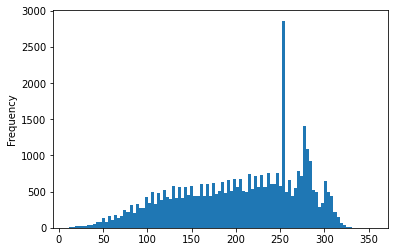

In [ ]:
# Chart - 3 visualization code
data['num_char'].plot(bins=100, kind='hist')

In [ ]:
data['num_char'].describe()

count    41157.000000
mean       204.200160
std         68.655129
min         11.000000
25%        151.000000
50%        215.000000
75%        259.000000
max        355.000000
Name: num_char, dtype: float64

In [ ]:
data[data['num_char'] == 11]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
9776,13575,58527,"Scotland, United Kingdom",2020-03-20,Be like Bob,Positive,11,3,1
16872,20671,65623,?? ?,2020-03-23,Cartoon for,Neutral,11,2,1
20467,24266,69218,Coastal Elite ?,2020-03-25,Omg y all,Neutral,11,3,1
35526,39325,84277,"Indore, India",2020-09-04,amp,Neutral,11,1,1


In [ ]:
data[data['num_char'] == 355]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
25160,28959,73911,"Melbourne, Australia",2020-03-30,Crude oil dropped to its lowest in 17 years in...,Extremely Negative,355,57,2


In [ ]:
data[data['num_char'] == 355]['OriginalTweet'].iloc[0]

'Crude oil dropped to its lowest in 17 years in Asia as #coronavirus in #US and #EU shows little sign of slowing.\r\r\n\r\r\nNoon prices:\r\r\n#SPX500Â\x962504.3\r\r\n#NAS100Â\x967507.1\r\r\n#WTIÂ\x9620.24\r\r\n#GOLDÂ\x961618.08\r\r\n#SILVERÂ\x9614.118\r\r\n\r\r\nWatch these prices closely: https://t.co/WuiEEfSNOj\r\r\n\r\r\n#COVID19 #CoronaVirusOutbreak https://t.co/j68MZIDXAd https://t.co/9MyqGxutUU'

In [ ]:
data[data['num_char'] == 280]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
8,3807,48759,"Atlanta, GA USA",2020-03-16,Due to COVID-19 our retail store and classroom...,Positive,280,52,4
27,3826,48778,Everywhere You Are!,2020-03-16,This morning I tested positive for Covid 19. I...,Extremely Negative,280,61,6
53,3852,48804,NaN,2020-03-16,"Dear Coronavirus, \r\r\nI've been following so...",Positive,280,52,5
374,4173,49125,East Central Alberta,2020-03-16,#NewZealand beef exports to U.S. and Canada ar...,Extremely Positive,280,53,5
408,4207,49159,"Wayne, NJ",2020-03-16,Anyone who suspects price gouging and other CO...,Extremely Negative,280,48,2
...,...,...,...,...,...,...,...,...,...
40999,44798,89750,United States,2020-04-14,Company Withdraws Fiscal 2020 Financial Guidan...,Positive,280,59,1
41018,44817,89769,https://ivotoniut.blogspot.com,2020-04-14,In #Italy the composition has always been indi...,Negative,280,60,4
41027,44826,89778,"Toronto, ONT, Canada",2020-04-14,this deck by .@lukew in insanely good - great ...,Extremely Positive,280,52,5
41032,44831,89783,Connecticut,2020-04-14,"Thank you to all our health care workers , doc...",Extremely Positive,280,53,3


##### 1. Why did you pick the specific chart?

We used this specific chart to check plot the histogram for our length of the tweets, and to check the average, maximum and minimum length of tweets in the dataset

##### 2. What is/are the insight(s) found from the chart?



*   The length of the shortest tweet is 11
*   The length of the longest tweet is 355, and it is from Melbourne, Australia. The Sentiment of this tweet is negative
*   The average length of tweets that is number of characters lies between 250-300.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These length of tweets can help the business in spam classification also

#### Tweet and sentiment relation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


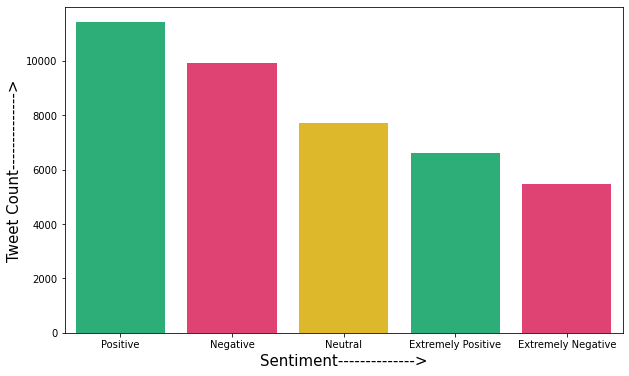

In [ ]:
# Chart - 4 visualization code
# ploting countplot for "Sentiment" column
plt.figure(figsize=(10,6))
sns.countplot('Sentiment',data=data,order=data.Sentiment.value_counts().index,palette = ['#17C37B','#F92969','#FACA0C'])
plt.xlabel("Sentiment-------------->", fontsize=15)
plt.ylabel("Tweet Count-------------->", fontsize=15)
plt.xticks()
plt.show()

In [ ]:
no_of_pos_tweets = len(data[data['Sentiment'] == 'Positive'])
no_of_neg_tweets = len(data[data['Sentiment'] == 'Negative'])
no_of_neutral_tweets = len(data[data['Sentiment'] == 'Neutral'])

In [ ]:
count_dic = {'Sentiments':['Positive', 'Negative', 'Neutral'], 'Count':[no_of_pos_tweets, no_of_neg_tweets, no_of_neutral_tweets]}

In [ ]:
count_df = pd.DataFrame(count_dic)

In [ ]:
count_df

,Sentiments,Count
0,Positive,11422
1,Negative,9917
2,Neutral,7713


##### 1. Why did you pick the specific chart?

* To Plot the countplot between difeerent classes in Setiment column.
* To check out the number of Tweets and sentiment relation.

##### 2. What is/are the insight(s) found from the chart?

* We have 18,046 Tweets of Positive Sentiment.
* We have 15,398 tweets of Negative Sentiment.
* We have 7,713 Tweets of Neutral Sentiment.
* Tweets with positve sentiments are the highest in number.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As there are more number of positive tweets, negative tweets are not less in number. So, company may try to run some social campaign that is based on spreading the positivity throughout the community, which will benefit the company as it'll increase the loyalty and trust of users in the company.

#### Frequency of popularily used hashtag word such as "coronavirus","COVID2019","covid19" etc.. in our OriginalTweet Column.

In [ ]:
# Barplot for hashtags

import re 
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=#)\w+',OriginalTweet)
    return " ".join(line)
data['hash']=data['OriginalTweet'].apply(lambda x:find_hash(x))
temp=data['hash'].value_counts()[:][1:6]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
temp

## The above function find_ash use the regular expression module i.e. re. The function uses the re (regular expression) module to search for hashtags in the input string. The findall function of the re module is used to find all the hashtags in the string. The findall function takes a regular expression pattern as an argument and returns a list of all the matches.
## The regular expression pattern r'(?<=#)\w+' is used to match hashtags. The \w+ part of the pattern matches one or more alphanumeric characters (a-z, A-Z, 0-9). The (?<=#) part of the pattern specifies that the match should be preceded by a "#" symbol. This ensures that only words that start with "#" are matched as hashtags.

## Finally, the join function is used to join the list of hashtags into a single string, with a space character between each hashtag. This resulting string is returned by the function.

,Hashtag,count
0,coronavirus,2670
1,Covid_19,652
2,Coronavirus,541
3,COVID2019,415
4,coronavirus COVID19,215


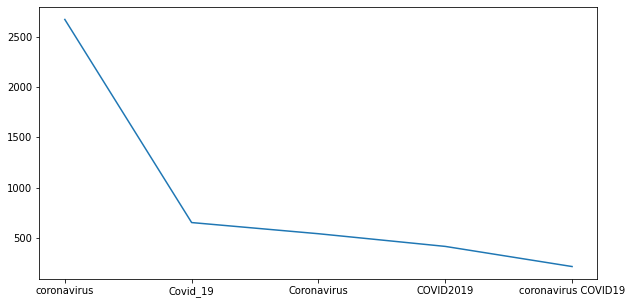

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.plot(temp["Hashtag"],temp["count"])     

##### 1. Why did you pick the specific chart?

We have used this plot to plot the graph for different hashtags used in tweets and to check their frequency.

##### 2. What is/are the insight(s) found from the chart?

* coronavirus Hashtag is the most used hashtag in the tweets that are given in our dataset.
* It has been used 2670 times by different users in their tweets.
* Other popular hashtags are Covid_19 with frequency 652, Coronavirus with frequency 541, COVID2019 with frequency 415, and the last one that is coronavirus COVID19 with frequency 215

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can use this insight to keep a check on what's trending and why is it in the trend, so that it could help in posting targeted ads and relatable campaigns throughout the platform.

#### Mostly tagged people across the community.

In [ ]:
# Chart - 6 visualization code
import re 
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=@)\w+',OriginalTweet)
    return " ".join(line)
data['tags']=data['OriginalTweet'].apply(lambda x:find_hash(x))
temp=data['tags'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Tag','tags':'count'})
temp

,Tag,count
0,realDonaldTrump,125
1,YouTube,74
2,BorisJohnson,62
3,Tesco,61
4,amazon,59
5,FTC,45
6,sainsburys,41
7,McKinsey,33
8,piersmorgan,33
9,narendramodi,31


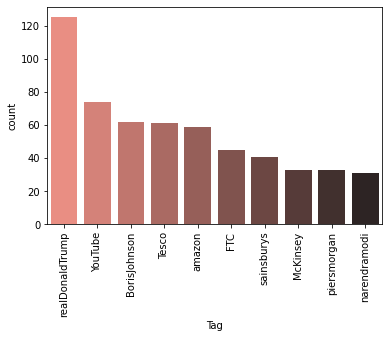

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x="Tag",y="count", data = temp,palette="dark:salmon_r")

##### 1. Why did you pick the specific chart?

Here we have used barplot to check the plot of different tags used by people in their tweets, which accounts were mostly tagged by people across the community.

##### 2. What is/are the insight(s) found from the chart?

realDonaldTrump is the tag that's been mostly used by people across the world. DonalTrump is ex-president of America, and that's why people had tagged him the most in order to tell the severity of situations in different areas.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this company can find out the most famous and trending celebrities on their platform.

#### Location with respect to tweet count.

In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,237,38,1,,
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,


In [ ]:
data['Location'].fillna('', inplace = True)

In [ ]:
x = data.copy()

In [ ]:
x.rename(columns = {'Sentiment':'Tweet Count'}, inplace = True)

In [ ]:
# Chart - 7 visualization code
world_plot = x.groupby(['Location'], as_index=False).count()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.choropleth(world_plot, locations='Location', locationmode='country names', 
                    color='Tweet Count', hover_name= 'Location', projection='orthographic')

In [ ]:
fig.show()

In [ ]:
data['Location'].nunique()

12221

In [ ]:
data.shape

(41157, 11)

In [ ]:
data[data['Location'] == 'Kinshasa']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
20381,24180,69132,Kinshasa,2020-03-25,She does not have a face mask to wear amp has ...,Extremely Positive,217,44,1,,


In [ ]:
data[data['Location'] == 'Alberton, South Africa']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
40360,44159,89111,"Alberton, South Africa",2020-04-13,@HeidiGiokos @flysaa So disturbing that SA is ...,Positive,255,45,3,,HeidiGiokos flysaa


In [ ]:
data[data['Location'] == 'Namibia']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
21105,24904,69856,Namibia,2020-03-25,Providers of healthcare and hygiene products i...,Negative,227,34,1,,
21301,25100,70052,Namibia,2020-03-25,Mara this fools keep on suprising me. They wan...,Negative,238,45,4,,
24635,28434,73386,Namibia,2020-03-27,Even during DStv is just increasing their pric...,Negative,64,10,1,,
29979,33778,78730,Namibia,2020-06-04,Food Security The current demand is high even ...,Positive,260,43,1,,
29980,33779,78731,Namibia,2020-06-04,Our priority Number 1: is Airport or Food Secu...,Extremely Positive,72,14,2,,


##### 1. Why did you pick the specific chart?

* We used this chart to plot the relation between number of tweets and the location of the users who posted those tweets
* We have applied groupby on location to get the specific data to plot this chloropeth map.


##### 2. What is/are the insight(s) found from the chart?

Our number of tweets data is quite distributed across different locations, like In kinshasha and Alberton there are only 1 number of tweets while there are 5 tweets posted from Namibia 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company may learn which are the most active locations from where tweets are being posted by using this graphic and its insights. And can go on to develop more focused revenue-generating marketing strategies.



#### Visual representation of **Positive** words present in "OriginalTweet" Column.

In [ ]:
df_tweetAt=pd.DataFrame(data.TweetAt.value_counts())
df_tweetAt.reset_index(inplace=True)
df_tweetAt.rename(columns={'index':'Date', 'TweetAt':'Tweet_Count'}, inplace=True)
df_tweetAt

,Date,Tweet_Count
0,20-03-2020,3448
1,19-03-2020,3215
2,25-03-2020,2979
3,18-03-2020,2742
4,21-03-2020,2653
5,22-03-2020,2114
6,23-03-2020,2062
7,17-03-2020,1977
8,08-04-2020,1881
9,07-04-2020,1843


Text(0.5, 1.0, 'Count Plot of Tweet Date')

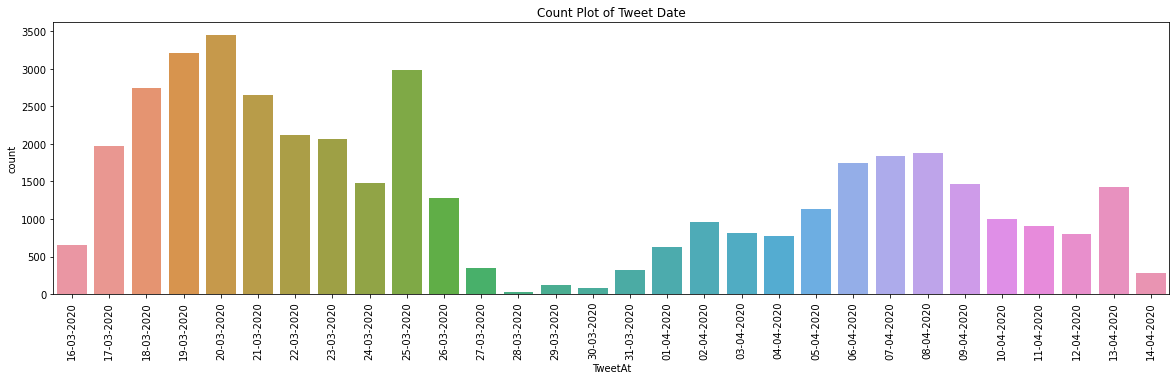

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x=data["TweetAt"])
plt.xticks(rotation=90)
plt.title('Count Plot of Tweet Date')

In [ ]:
# Chart - 8 visualization code
wc = WordCloud(width=700,height=600,min_font_size=10,background_color='white')


In [ ]:
data[data['Sentiment'] == 'Positive']['OriginalTweet']

1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
5        As news of the regionÂs first confirmed COVID...
6        Cashier at grocery store was sharing his insig...
                               ...                        
41140    Good News! \r\r\nWe'll Soon Announce Our High ...
41145    How exactly are we going to re-open New York C...
41146    #Gold prices rose to a more than 7-year high t...
41150    I never that weÂd be in a situation &amp; wor...
41154    You know itÂs getting tough when @KameronWild...
Name: OriginalTweet, Length: 11422, dtype: object

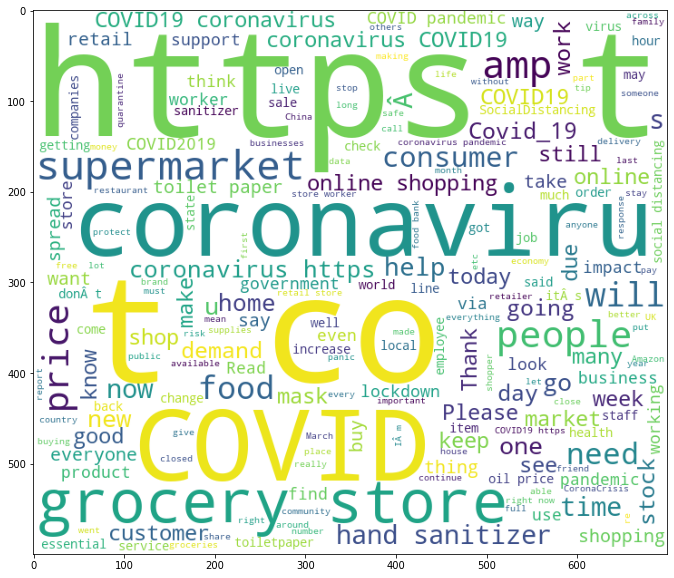

In [ ]:
#wordcloud for Positive Sentiment
positive_tweet = wc.generate(data[data['Sentiment'] == 'Positive']['OriginalTweet'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(positive_tweet)

##### 1. Why did you pick the specific chart?

Wordcloud shows the popularity of words or phrases by making the most frequently used words appear larger or bolder compared with the other words around them.

##### 2. What is/are the insight(s) found from the chart?

Here as we can see the word cloud broke the text down into component words and counting how frequently they appear in the body of text. And here it shows us what are the majority of the positive words used in the tweet

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Word clouds are an essential visual aid to highlight keywords that your business is focusing on. They offer a visible picture of text data and let you pick up on important words that customers might be using to describe you or how employees perceive the business.


#### Visual representation of **Negative** words present in "OriginalTweet" Column.

In [ ]:
# Chart - 9 visualization code
data[data['Sentiment'] == 'Negative']['OriginalTweet']

9        For corona prevention,we should stop to buy th...
24       @10DowningStreet @grantshapps what is being do...
26       In preparation for higher demand and a potenti...
28       Do you see malicious price increases in NYC? T...
30       There Is of in the Country  The more empty she...
                               ...                        
41127    Today at the grocery store I saw someone getti...
41131    In every human affliction there are  gainers a...
41147    YÂall really shitting that much more at home?...
41149    Still shocked by the number of #Toronto superm...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 9917, dtype: object

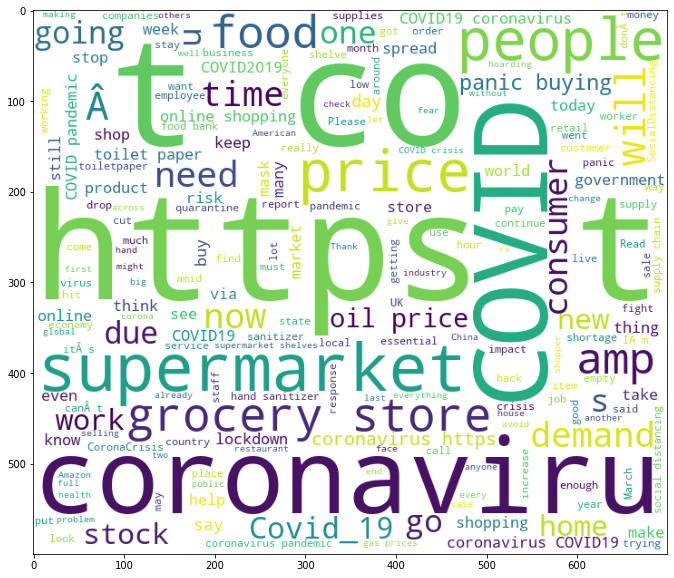

In [ ]:

negative_tweet = wc.generate(data[data['Sentiment'] == 'Negative']['OriginalTweet'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(negative_tweet)

##### 1. Why did you pick the specific chart?

Wordcloud shows the popularity of words or phrases by making the most frequently used words appear larger or bolder compared with the other words around them.

##### 2. What is/are the insight(s) found from the chart?

And here it shows us what are the majority of the negative tweeted words appeared in the pandemic data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Word clouds are an essential visual aid to highlight keywords that your business is focusing on. They offer a visible picture of text data and let you pick up on important words that customers might be using to describe you or how employees perceive the business.


#### Visual representation of **Neutral** words present in "OriginalTweet" Column.

In [ ]:
# Chart - 10 visualization code
data[data['Sentiment'] == 'Neutral']['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
7        Was at the supermarket today. Didn't buy toile...
10       All month there hasn't been crowding in the su...
16       ????? ????? ????? ????? ??\r\r\n?????? ????? ?...
17       @eyeonthearctic 16MAR20 Russia consumer survei...
                               ...                        
41141    #Coronavirus ?? ????? ??? ????? ?? ??? ???????...
41143    https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...
41144    @_Sunrise_SV @Gamzap @NPR What does not having...
41152    Airline pilots offering to stock supermarket s...
41155    Is it wrong that the smell of hand sanitizer i...
Name: OriginalTweet, Length: 7713, dtype: object

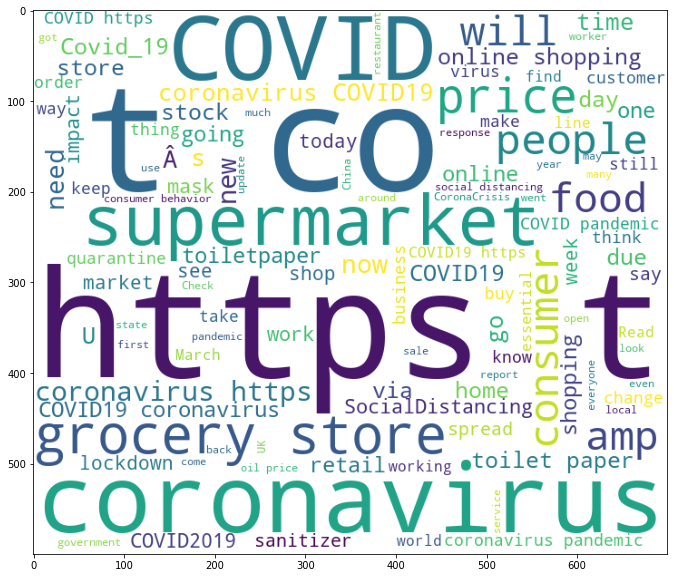

In [ ]:

neutral_tweet = wc.generate(data[data['Sentiment'] == 'Neutral']['OriginalTweet'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(neutral_tweet)

##### 1. Why did you pick the specific chart?

Wordcloud shows the popularity of words or phrases by making the most frequently used words appear larger or bolder compared with the other words around them.

##### 2. What is/are the insight(s) found from the chart?

And here it shows us what are the majority of the negative tweeted words appeared in the pandemic data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Word clouds are an essential visual aid to highlight keywords that your business is focusing on. They offer a visible picture of text data and let you pick up on important words that customers might be using to describe you or how employees perceive the business.

#### Summarization of information present in our given dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72c91355b0>,
      dtype=object)

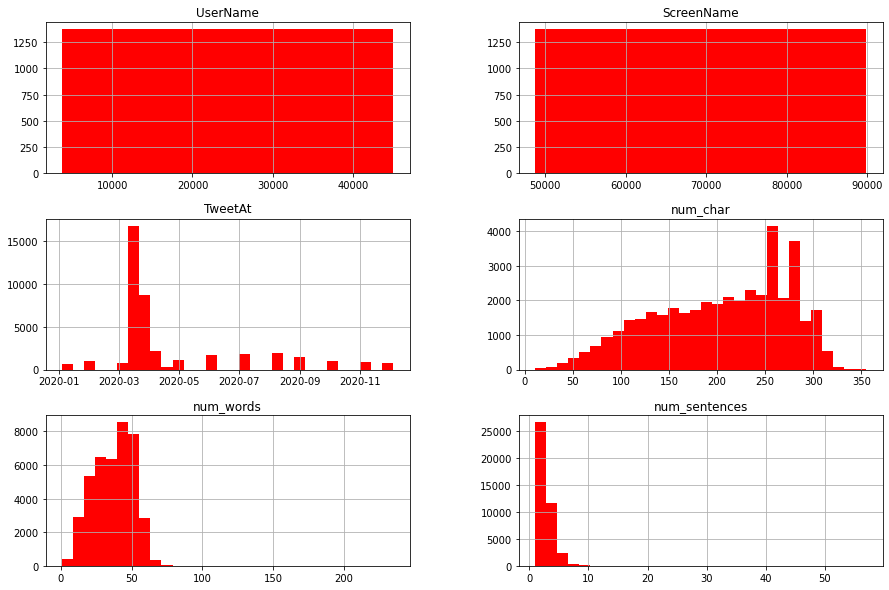

In [ ]:
# Chart - 11 visualization code
data.hist(bins=30,figsize=(15,10),color="r")

##### 1. Why did you pick the specific chart?

It is used to summarize data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

##### 2. What is/are the insight(s) found from the chart?

In the first given data we can see that to every row the user name and screen name are unique so the data is distributed uniformly, and in the TweetAt column we can see the the tweets are high during the 3rd month(March) and 5th(May) month as the first wave of pandemic was spread from the month of March 2020 and there was chaos. Likewise we may see that number of words that are tweeted maximumly between 200-300 with minimum sentences and the words below 50

##### 3. Will the gained insights help creating a positive business impact? 


Yes, it shows Twitter can play a vital role in disseminating time-critical information about the latest case rates and research results—and can do so faster than traditional news media, so it helps the business to give importance to the lastest information and speard the news faster than any media.

#### Chart - 12

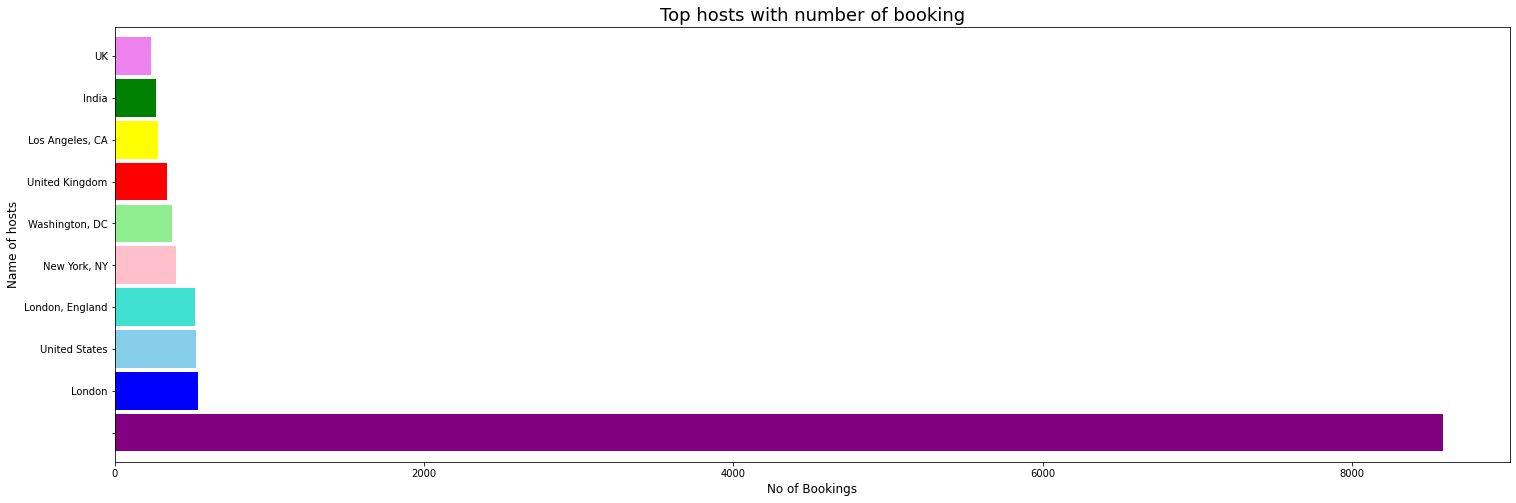

In [ ]:
# Chart - 12 visualization code
tweets=data['Location'].value_counts().sort_values(ascending=False)
tweets[:10].plot.barh(figsize=(25, 8), color= ["purple","blue","skyblue","turquoise","pink","lightgreen","red","yellow","green","violet","black"], width=0.9)
plt.title("Top hosts with number of booking", fontsize=18)
plt.xlabel('No of Bookings', fontsize=12)
plt.ylabel('Name of hosts', fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

The purpose of a bar graph is to convey relational information quickly in a visual manner. so we used the bar plot such that it displays the value for a particular category of data.

##### 2. What is/are the insight(s) found from the chart?

From the above visual we may see that the tweets made in London ar high followed by United States and England as the cases were increasing rapidly and the news used to spread through twitter fast.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Twitter is mostly based on short, text-based posts, it is perfectly optimised for conveying information, an argument, and many important and authentic information specially during pandemic. Hence, it impacts the business to check the authenticity of the information and to spread the right news across the world as Twitter is handled all over the world. 

#### Correlation Heatmap

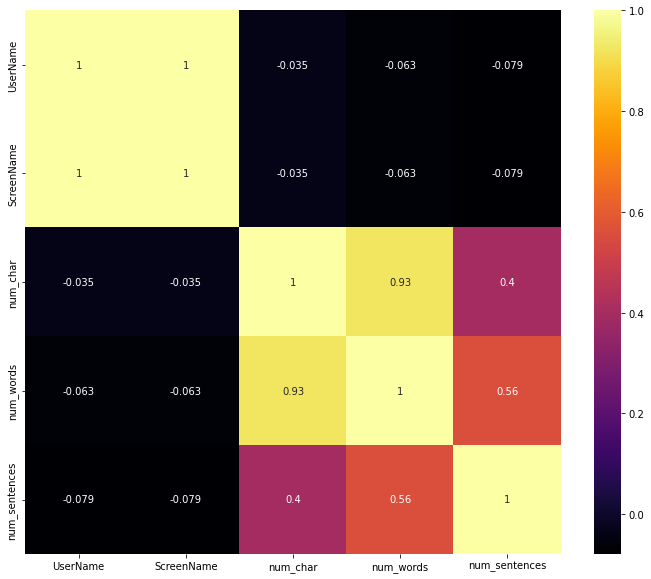

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot= True, cmap='inferno')

##### 1. Why did you pick the specific chart?

We used heat maps as **Heat Maps** are graphical representations of data that utilize color-coded systems. The primary purpose of Heat Maps is to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## Feature Engineering & Data Pre-processing

### Handling Missing Values

In [ ]:
data.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
39106,42905,87857,"Jinja, Uganda ?? mafubira",2020-12-04,Shop Walmart online and still get the lowest p...,Extremely Positive,172,30,1,,
18070,21869,66821,,2020-03-23,N95 face mask/75% alcohol hand sanitizer avail...,Positive,198,36,3,n95 facemask handsanitizer coronavirus antivir...,
28090,31889,76841,"Chennai, India",2020-04-04,#BigStory | How #Covid-19 changes the outlook ...,Neutral,136,24,1,BigStory Covid economy stockmarket BLportfolio...,lokeshwarri
2080,5879,50831,UK,2020-03-17,"Everyone who selfishly bought ALL the milk, br...",Positive,188,36,1,COVID2019,
26236,30035,74987,,2020-02-04,There s almost no one left whose job hasn t be...,Negative,202,41,1,,
1939,5738,50690,"Sydney, New South Wales",2020-03-17,Funny how all of these Âlow-skilledÂ jobs (c...,Negative,285,51,2,,
2370,6169,51121,"Long Beach, CA",2020-03-17,Great way to support the health of the communi...,Extremely Positive,84,15,2,COVID19,
29772,33571,78523,"Hatfield, UK",2020-05-04,@dreamy_blue WeÂre working closely with suppl...,Positive,255,47,3,,dreamy_blue
15538,19337,64289,WESTERN TEXAS,2020-03-22,Attention Californians SoCal supermarket in...,Positive,142,22,1,,
10807,14606,59558,"Adelaide, South Australia",2020-03-20,And this... @SparkkeWhitmore is offering FREE ...,Extremely Positive,192,37,2,,SparkkeWhitmore 9NewsAdel


In [ ]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
num_char         0
num_words        0
num_sentences    0
hash             0
tags             0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### Expand Contraction

In natural language processing (NLP), contractions are shortened forms of words or phrases that are commonly used in spoken English. Examples of contractions include "don't" (short for "do not"), "can't" (short for "cannot"), and "I'll" (short for "I will" or "I shall"). These contractions are often used in informal text, such as text messages, social media posts, and speech.

In Python, there are several libraries available for working with contractions, such as contractions. contractions is a Python library for working with English contractions. It provides a simple, easy-to-use interface for expanding and contracting words and phrases in text.


In [ ]:
# Expand Contraction
!pip install contractions
import contractions

def expand_contractions(text_column):
    expanded_text = [contractions.fix(text) for text in text_column]
    return expanded_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 KB 10.7 MB/s eta 0:00:00


In [12]:
data['originaltweet'] = expand_contractions(data['OriginalTweet'])

In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,,2020-03-16,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,,My food stock is not the only one which is emp...
4,3803,48755,,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,,"Me, ready to go at supermarket during the #COV..."


In [ ]:
data['OriginalTweet'].iloc[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [ ]:
data['originaltweet'].iloc[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

### Categorical Encoding

In [13]:
new_df= data[['originaltweet','Sentiment']]

In [17]:
## 3 class Classification
new_df["Sentiment"]= new_df["Sentiment"].replace('Positive',3) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Extremely Positive',3) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Neutral',2) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Negative',1) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Extremely Negative',1) 

# We have encoded our 5 categorical classes of target variable into 3, in order to perform the multiclass classification

In [18]:
new_df_binary = data[['originaltweet','Sentiment']]

In [19]:
## binary Classification
new_df_binary["Sentiment"]= new_df_binary["Sentiment"].replace('Positive',1) 
new_df_binary["Sentiment"]= new_df_binary["Sentiment"].replace('Extremely Positive',1) 
new_df_binary["Sentiment"]= new_df_binary["Sentiment"].replace('Neutral',1) 
new_df_binary["Sentiment"]= new_df_binary["Sentiment"].replace('Negative',0) 
new_df_binary["Sentiment"]= new_df_binary["Sentiment"].replace('Extremely Negative',0)

#Here We have encoded our 5 categorical classes of target variable into binary (0,1), in order to perform the binary classification an obtain the best accuracy 

#### 2. Lower Casing

In [20]:
# Lower Casing
data["originaltweet"] = data["originaltweet"].str.lower()
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia: woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me, ready to go at supermarket during the #cov..."


#### 3. Removing Punctuations

In [22]:
# write function for removing @user
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

# create new column with removed @user
data['originaltweet'] = np.vectorize(remove_pattern)(data['originaltweet'], '@[\w]*')

#Here we are removing the @users from our tweet column as its not important for our analysis.

In [ ]:
data['originaltweet'].iloc[0]

'   https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [23]:
#Removing URL and HTML tags
def remove_url(text):
  pattern =re.compile('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*')
  return pattern.sub(r'',text)

data['originaltweet']=data['originaltweet'].apply(remove_url)
data.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia: woolworths to give elde...


In [24]:
# Remove Punctuations


PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["originaltweet"] = data["originaltweet"].apply(lambda x: remove_punctuation(x))
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the covid...


In [ ]:
data['originaltweet'].iloc[3]

'my food stock is not the only one which is empty\r\r\n\r\r\nplease do not panic there will be enough food for everyone if you do not take more than you need \r\r\nstay calm stay safe\r\r\n\r\r\ncovid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral '

#### Removing Stopwords & Removing White spaces

In [25]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text_column):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    cleaned_text = []
    for text in text_column:
        text = [word for word in text.split() if word.lower() not in stop_words]
        cleaned_text.append(" ".join(text))
    return cleaned_text


In [26]:
data['originaltweet'] = remove_stopwords(data['originaltweet'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['originaltweet'].sample(5)

41098    wsj farmers dump milk break eggs coronavirus r...
21305    following governmentâs latest advice ecommerc...
1167     work organization provides foodbank thursday u...
4202     finally consumer unit supervising attorney jen...
21283    smart safe fraudulent coronavirus tests vaccin...
Name: originaltweet, dtype: object

In [27]:
# Remove White spaces
def remove_white_spaces(text_column):
    cleaned_text = []
    for text in text_column:
        text = " ".join(text.split())
        cleaned_text.append(text)
    return cleaned_text

In [28]:
data['originaltweet'] = remove_white_spaces(data['originaltweet'])

In [ ]:
data['originaltweet'].sample(5)

6164     please see latest update regarding covid â 19...
30277    coronavirus wiping store items disinfectant wi...
8749     sign petition convince close covid 19 currentl...
39493    opec allies agreed record cut almost 10 millio...
6829     modi also announced economic task force deal c...
Name: originaltweet, dtype: object

In [29]:
#function to remove Emoji
def remove_emojis(text_column):
    cleaned_text = []
    emoji_pattern = re.compile("["
        u"\U0001f600-\U0001f64f"  # emoticons
        u"\U0001f300-\U0001f5ff"  # symbols & pictographs
        u"\U0001f680-\U0001f6ff"  # transport & map symbols
        u"\U0001f1e0-\U0001f1ff"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    for text in text_column:
        text = emoji_pattern.sub(r'', text)
        cleaned_text.append(text)
    return cleaned_text

In [30]:
data['originaltweet'] = remove_emojis(data['originaltweet'])

### Rephrase Text

spacy is a popular Python library for natural language processing (NLP). One of the features provided by spaCy is the Matcher class, which allows you to match patterns in text. The Matcher class uses a rule-based approach to match sequences of tokens in a document. It can be useful for tasks such as named entity recognition, where you want to find specific types of entities (e.g., people, organizations, locations) in text.

The spacy.matcher library provides classes for rule-based matching and token-based matching. Matcher is designed to work with large volumes of text and can handle multiple languages. Matcher is implemented on top of the vocabulary and lexemes and is a part of the Doc or Token, but the patterns are defined on Doc, Token or Span level.

In [31]:
# Rephrase Text
import spacy
from spacy.matcher import PhraseMatcher

def rephrase_text(text_column):
    nlp = spacy.load("en_core_web_sm")
    matcher = PhraseMatcher(nlp.vocab)
    rephrased_text = []
    for text in text_column:
        doc = nlp(text)
        matches = matcher(doc)
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]
            span = doc[start:end]
            span.merge()
            span.text = "rephrased version of matched text"
        rephrased_text.append(doc.text)
    return rephrased_text

In [32]:
data['originaltweet'] = rephrase_text(data['originaltweet'])

In [ ]:

data['originaltweet'].iloc[3]

'food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral'

#### 7. Tokenization

In [37]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize_text(text_column, token_type='word'):
    nltk.download('punkt')
    if token_type == 'word':
        tokenizer = word_tokenize
    elif token_type == 'sentence':
        tokenizer = sent_tokenize
    else:
        raise ValueError("Invalid token_type. Choose 'word' or 'sentence'.")
    tokenized_text = []
    for text in text_column:
        tokens = tokenizer(text)
        tokenized_text.append(tokens)
    return tokenized_text

In [34]:
data['originaltweet'] = tokenize_text(data['originaltweet'], token_type='sentence')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data['originaltweet'].sample(5)

5260     [gold prices suffer severe sell hits markets e...
22196    [covid19 pandemic dramatically changing consum...
648      [pls yell retail employees fault store run alc...
37891    [going survive lockdown standby people going s...
9380     [supermarket tomorrows head line news liver di...
Name: originaltweet, dtype: object

#### 8. Text Normalization

In [35]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem.porter import *
stemmer = PorterStemmer()
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text)) 

In [36]:
data['originaltweet'] = data['originaltweet'].apply(lambda x: stemming(x))

##### Which text normalization technique have you used and why?



We have used Stemming, as it is a technique that is used to normalize text by reducing words to their base form or root. This is useful when working with natural language text data because it helps to reduce the dimensionality of the data by reducing the number of unique words that need to be processed.

In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,coronavirus australia woolworths give elderly ...
3,3802,48754,,2020-03-16,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,,food stock one empty please panic enough food ...
4,3803,48755,,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,,ready go supermarket covid19 outbreak paranoid...


#### 10. Text Vectorization

In [38]:
x = new_df['originaltweet']
x_binary = new_df_binary['originaltweet']

In [39]:
#TfidVectorizer 3 class

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words= 'english')

X = vectorizer.fit_transform(x)


In [40]:
#TfidVectorizer binary

# from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer(stop_words= 'english')

X_binary = vectorizer1.fit_transform(x_binary)

In [ ]:
# new_df = data.copy()
# new_df_binary = data.copy()

In [41]:
y = new_df['Sentiment']
y_binary = new_df_binary['Sentiment']

In [42]:
#import library for 3 class classification

from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()

X_smote, Y_smote = oversample.fit_resample(X, y)
     

In [43]:
#import library for binary classification
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()

X_smote_binary, Y_smote_binary = oversample.fit_resample(X_binary, y_binary)

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

In [44]:
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=.25, random_state=42)

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# classification Ml models


In [ ]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train, y_train)
    
    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)

In [ ]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.807092722571112
Accuracy score of the  SVC(kernel='linear')  =  0.8282970077576653
Accuracy score of the  KNeighborsClassifier()  =  0.3593646102696712
Accuracy score of the  RandomForestClassifier()  =  0.7752493535278907


In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.8228456025416842
Validation accuracy Score :  0.718285925378648
              precision    recall  f1-score   support

           1       0.79      0.69      0.73      5203
           2       0.59      0.87      0.70      3002
           3       0.77      0.67      0.72      5330

    accuracy                           0.72     13535
   macro avg       0.72      0.74      0.72     13535
weighted avg       0.74      0.72      0.72     13535



In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_train_accuracy = sgd_clf.score(X_train,y_train)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("training accuracy Score    : ",sgd_train_accuracy)
print("testing accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

training accuracy Score    :  0.8458242001822526
testing accuracy Score :  0.7824898411525674
              precision    recall  f1-score   support

           1       0.73      0.82      0.77      4037
           2       0.90      0.71      0.80      5575
           3       0.72      0.84      0.77      3923

    accuracy                           0.78     13535
   macro avg       0.78      0.79      0.78     13535
weighted avg       0.80      0.78      0.78     13535



In [45]:
logreg_multiclass = LogisticRegression()

In [46]:
logreg_multiclass.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = logreg_multiclass.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy score of the  = ', accuracy)

Accuracy score of the  =  0.8178795714813447


In [48]:
parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

In [50]:
grid_search_lg = GridSearchCV(logreg_multiclass, parameters, cv=5)

In [51]:
grid_search_lg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [52]:
print("Best parameters: ", grid_search_lg.best_params_)

Best parameters:  {'C': 10, 'penalty': 'l2'}


In [53]:
y_pred = grid_search_lg.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8441817510158848


Binary Classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_binary, Y_smote_binary,test_size = 0.25,random_state=42)


In [ ]:
# ML Model - 1 Implementation
# list of models
models_for_binary = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]


In [ ]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.8574534161490683


In [ ]:
naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_train_accuracy = sgd_clf.score(X_train,y_train)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("training accuracy Score    : ",sgd_train_accuracy)
print("testing accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy score of the  = ', accuracy)

In [ ]:
parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

In [ ]:
grid_search = GridSearchCV(logreg, parameters, cv=5)

In [ ]:
grid_search.fit(X_binary, y_binary)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [ ]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 10, 'penalty': 'l2'}


In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9536490683229814


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


#fit above parameter in gridsearch


# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart
svc_clf = SVC(kernel='linear', C=1)
svc_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [56]:
accuracy = svc_clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8355374953823421


In [57]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

In [58]:
grid_search_svc = GridSearchCV(estimator=svc_clf, param_grid=param_grid, cv=5)
grid_search_svc.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
print("Best hyperparameters: ", grid_search_svc.best_params_)

In [ ]:
y_pred_svc = grid_search_svc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy: ", accuracy)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

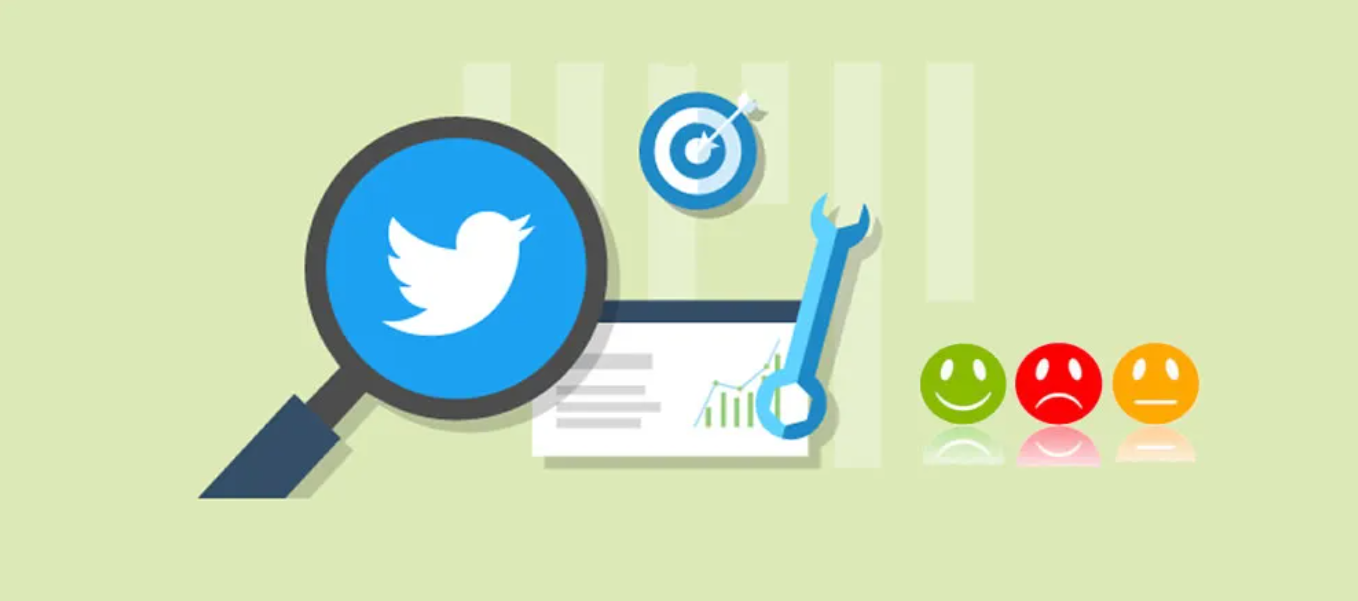

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***